<a href="https://colab.research.google.com/github/alvinadar/Dimension-Reduction-/blob/main/Dimension_Reduction_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Dimension Reduction?

	•	Many datasets (like images, text, genetics, finance) have hundreds or thousands of features.
	•	Not all features are useful — some are redundant (correlated with others) or noisy (random, not adding information).
	•	Dimension reduction is the process of transforming high-dimensional data into a smaller set of features while keeping as much useful information as possible.

##Think of it as
* Summerizing a big dataset into fewer dimensions,like condensing a long book into a short summary but still keeping the main idea.

#Why do we need this ?

##1 . Visualization :

* Humans can't visualize 100 dimensional data , but we can only see 2D/3D plots only.

* Dimension reduction allows us to plot and explore clusters.

##2.Speed and efficiency:

* Fewer features = faster training of ML models

##3. Noise Reduction:

* Removes irrelevant features that may confuse the model.

##4.Avoid Overfitting:

* Reducing features helps models generalize better.

#For supervised we use feature selection

* Correlation ,Chi Squared ,Mutual Infomation
* Wrapper Method

`Pros`: Keeps interpretability (Fetures stay the same) .

`Cons`: Might miss hidden combination of fetures.

#For unsupervised  Feature extraction.

* Transform the original data into smaller set of new variables.
* The new features are combinations of the old ones.
* Techniques:
    * PCA(Principle Component Analysis).
    * LDA (Linear Discriminant Analysis).
    * t-SNE (t-Distributed Stochastic Neighbor Embedding ).
    *	UMAP (Uniform Manifold Approximation and Projection).
    * Autoencoders (Neural Networks for compression).

`Pros:`Captures hidden structure , powerfull for visualiztion.

`Cons`: New features are harder to interpret.


#PCA(Principle Component Analysis)

* Goal : Find new axes (Called Principle Component) that captures the most variance in the data

Example:
   * Supposed we have height and weight ,They are correlated.
   * PCA will crate a new axisi libe "Body Size" that combines both into one.

`Used for:`Visualiztion

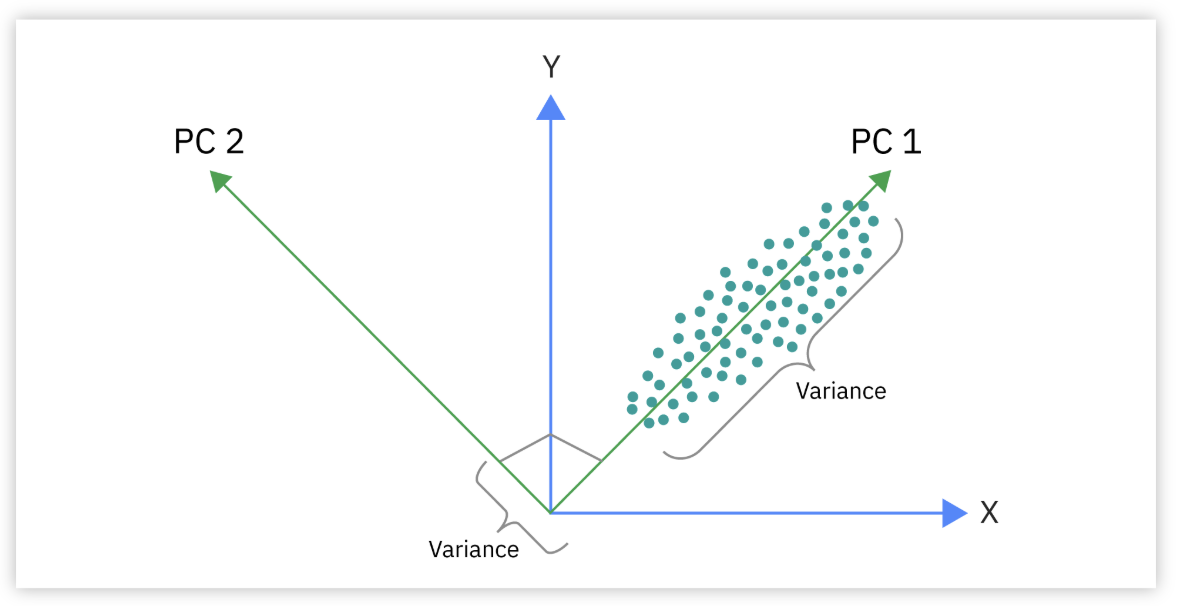

#Implement PCA for the given K-Means Clustering example

In [28]:
#To apply PCA we ise the PCA library from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Load the dataset

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

df = pd.DataFrame(X,columns=iris.feature_names)

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#We call the PCA library
#100 featues -> You want to visualize it , n_component mean n dimension if we set the dimension -> n_component = 2 means we have 2 dimension
pca = PCA(n_components=2,random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [33]:
#Take note-> When we reduce the dimension, we need to know how much data is retained after dimension reduction
#To check how much data is retained after reducing the dimension we use the consept of explained variance
#We are literally shirinking the data
#Its a good point to check how much data had been retained after shrinking the data
print(f"Explained variance ratio {pca.explained_variance_ratio_.round(2)}")#Output PC1 : 0.7296 , PC2: 0.22
print(f"Total explained variance {pca.explained_variance_ratio_.sum().round(3)}")#The output is 0.958 which means 95% of the data had been retained

Explained variance ratio [0.73 0.23]
Total explained variance 0.958


#Implement K-Means CLustering

In [34]:
k = 2

kmeans_pca = KMeans(n_clusters=k,random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

#Get the center point or the centroids

In [35]:
centroids_pca = kmeans_pca.cluster_centers_

#Plot

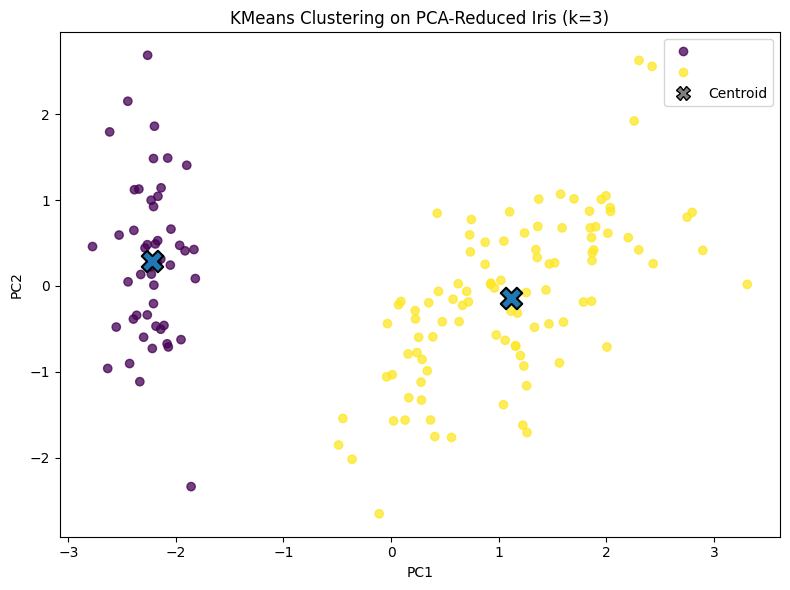

In [36]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, alpha=0.75)

# Plot centroids (big X markers)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=240, edgecolors='black', linewidths=1.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering on PCA-Reduced Iris (k=3)")

# Legend: clusters + centroids
handles, _ = scatter.legend_elements(prop="colors", alpha=0.75, fmt="Cluster {x}")
centroid_handle = plt.Line2D([0], [0], marker='X', color='w',
                             markerfacecolor='gray', markeredgecolor='black',
                             markersize=10, linestyle='None', label='Centroid')
plt.legend(handles + [centroid_handle], [h.get_label() for h in handles] + ['Centroid'])
plt.tight_layout()
plt.show()

#When we do a clustering for unsupervised , you need to evaluate your clustering performance.

#Evaluate the clustering using Silhouette Score

##The Silhouette Score measures how well each data point fits into its assigned cluster compared to other clusters.

#The output of a Silhoutte Score  range from + 1 to -1.

	•	+1 → point is well-clustered (tight within cluster, far from others)
	•	0 → on the boundary between clusters
	•	-1 → likely in the wrong cluster



#Interpretation

	•	0.7 – 1.0 → Strong, well-separated clusters
	•	0.5 – 0.7 → Reasonable structure
	•	0.25 – 0.5 → Weak structure
	•	< 0.25 → Poor clustering, random or overlapping groups

#Import the silhouette score

In [37]:
from sklearn.metrics import silhouette_score

#Compute Silhouetter Score

In [38]:
sil_score = silhouette_score(X_pca,labels_pca)
print(f"Silhouetter Score (k = {k}): {sil_score:.3f}")

Silhouetter Score (k = 2): 0.615


#Sometimes when using the elbow method can be abit misleading , so in this case to validate the best cluster we use the silhouette score .

##Alternatively we use a for loop to loop throught the code with the optimal silhouette score.

In [39]:
#We use for loop

scores = {}

for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  labels = kmeans.fit_predict(X_pca)
  score = silhouette_score(X_pca, labels)
  scores[k] = score
  print(f"k={k}, silhouette={score:.3f}")

k=2, silhouette=0.615
k=3, silhouette=0.523
k=4, silhouette=0.445
k=5, silhouette=0.411
k=6, silhouette=0.362
k=7, silhouette=0.355
k=8, silhouette=0.419
k=9, silhouette=0.442
k=10, silhouette=0.441


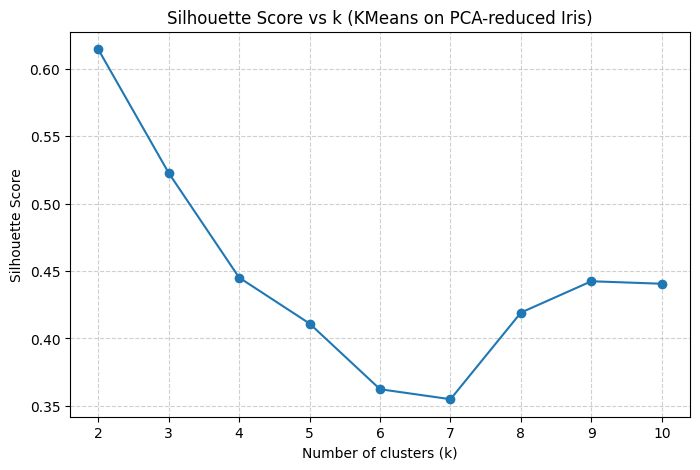

In [40]:
plt.figure(figsize=(8,5))
plt.plot(list(scores.keys()), list(scores.values()), marker="o")
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k (KMeans on PCA-reduced Iris)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()